In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## Import

In [5]:
# https://waterdata.usgs.gov/nwis/dv?referred_module=qw&search_criteria=site_tp_cd&search_criteria=obs_count_nu&submitted_form=introduction
ds = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/WaterQuality/oxygen_all_16171819.csv')

ds = ds.set_index('site_no')

ds

,2016.11.11,2016.11.12,2016.11.13,2016.11.14,2016.11.15,2016.11.17,2016.11.18,2016.11.19,2016.11.20,2016.11.22,...,2020.11.02,2020.11.03,2020.11.04,2020.11.05,2020.11.06,2020.11.07,2020.11.08,2020.11.09,2020.11.10,2020.11.11
site_no,,,,,,,,,,,,,,,,,,,,,
2.110500e+06,4.6,4.9,5.3,5.8,5.6,5.7,5.8,5.9,6.0,6.5,...,4.6,5.1,5.5,5.5,5.4,5.2,5.2,5.1,4.9,4.7
2.110777e+06,5.6,6.1,6.6,6.8,6.8,6.9,6.9,6.9,7.1,7.3,...,6.4,6.4,6.2,6.1,6.1,6.3,6.6,6.9,7.1,6.9
2.110550e+06,4.5,4.9,5.3,5.8,5.7,5.7,5.7,5.9,6.1,6.5,...,5.0,5.4,5.8,6.2,6.2,6.0,5.7,5.5,5.3,5.1
8.070200e+06,8.6,8.6,8.5,8.8,8.7,8.9,8.7,9.2,9.7,9.7,...,9.4,9.6,9.6,9.5,9.4,9.3,9.2,8.8,8.5,8.4
5.082500e+06,11.1,11.3,11.5,11.7,11.7,11.9,12.0,12.3,12.8,13.6,...,13.3,13.2,13.2,12.9,12.5,12.4,12.2,11.8,11.8,11.8
2.110704e+06,3.8,4.2,4.6,5.0,5.0,5.0,5.1,5.1,5.3,5.6,...,4.5,4.9,5.2,5.6,5.9,6.0,6.0,5.8,5.5,5.3
2.110400e+06,7.3,7.8,8.7,8.9,8.3,8.3,8.3,8.1,8.8,9.9,...,7.9,9.0,9.2,8.9,8.4,8.1,8.1,7.9,7.7,7.5
5.435950e+06,10.8,11.3,11.3,11.1,11.0,10.9,10.3,11.3,12.2,11.8,...,10.6,11.5,11.1,11.0,11.1,10.8,10.8,10.2,8.9,9.6
2.110802e+06,3.0,3.6,4.4,4.7,4.3,4.4,4.4,4.6,4.7,5.3,...,4.1,4.4,4.7,4.9,5.3,5.5,5.8,5.8,5.4,5.2


#### Test if the data is stationary

In [6]:
num_nonstat = 0
stat_idx = []
for i in range(ds.shape[0]):
    rst = adfuller(ds.iloc[i,:].values)
    if rst[1] > 0.05:
        num_nonstat += 1
        print("row index:", i, "p value", rst)
    else:
        stat_idx.append(i)
        
print("\n", 'number of nonstationary rows:', num_nonstat)
print("\n", "stationary index", stat_idx)


 number of nonstationary rows: 0

 stationary index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


#### Plots

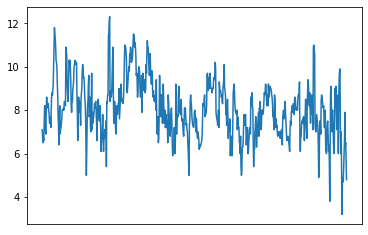

In [33]:
# site 2167716

fig, ax = plt.subplots( nrows=1, ncols=1 )  
ax.plot(ds.iloc[14, :].values)
ax.set_xticks([])
plt.show()
fig.savefig('/Users/yufei/Documents/2-CMU/PowerIter/Plots/RealDataWater/oxygen_16171819.eps')   # save the figure to file
plt.close(fig)    # close the figure window

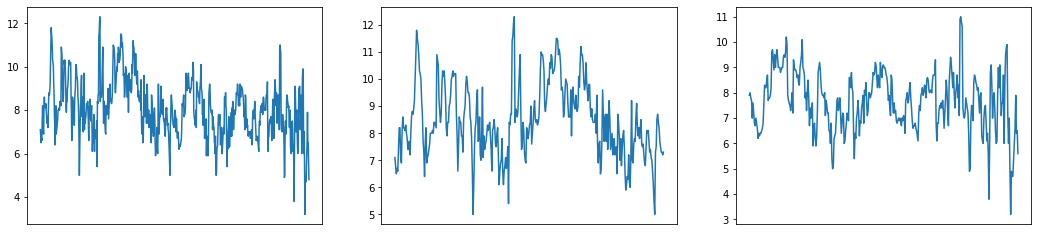

In [51]:
fig, ax = plt.subplots( nrows=1, ncols=3, figsize=(18, 4) )  # create figure & 1 axis
ax[0].plot(ds.iloc[14, :].values)
ax[0].set_xticks([])
ax[1].plot(ds_train.iloc[14, :].values)
ax[1].set_xticks([])
ax[2].plot(ds_test.iloc[14, :].values)
ax[2].set_xticks([])
plt.show()
fig.savefig('/Users/yufei/Documents/2-CMU/PowerIter/Plots/RealDataWater/oxygen_16171819_three.eps')   # save the figure to file
plt.close(fig)    # close the figure window

## Variance Explained

In [34]:
# The length we picked out
l2 = ds.shape[1] - 1

ds_temp = ds.iloc[:, :l2]
n_train = l2 // 2

ds_train = ds_temp.iloc[:, :n_train]
ds_test = ds_temp.iloc[:, n_train:]

print(ds_train.shape, ds_test.shape)

(38, 372) (38, 372)


In [41]:
v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/WaterQuality/v_ordi.txt', header = None).squeeze()
v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/WaterQuality/v_mnt.txt', header = None).squeeze()
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/WaterQuality/v_trunc.txt', header = None).squeeze()
v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/WaterQuality/v_elas.txt', header = None).squeeze()

In [42]:
score_ordi = pd.DataFrame(ds_test.apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test.apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test.apply(lambda x: np.dot(x, v_trunc), axis = 1))
score_elas = pd.DataFrame(ds_test.apply(lambda x: np.dot(x, v_elas), axis = 1))

In [43]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / np.sum(ds_test.apply(lambda x: np.var(x), axis = 0)) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / np.sum(ds_test.apply(lambda x: np.var(x), axis = 0)) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / np.sum(ds_test.apply(lambda x: np.var(x), axis = 0)) )
print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / np.sum(ds_test.apply(lambda x: np.var(x), axis = 0)) )

The variance explained by ordinary principal component: 0.6450936120395797
The variance explained by monotone principal component: 0.6574480357125723
The variance explained by truncated principal component: 0.6419467552248188
The variance explained by elassPCA principal component: 0.6426033032536549
